In [15]:
import uuid
from agents.reasoner import reasoner_run
from dto.response.matrix_chats import MessageDict
from dto.response.grades import GradeResponseBase
from typing import List
from utils.common import convert_msg_dict_to_langgraph_format
from IPython.display import display, Image
import asyncio

grades: List[GradeResponseBase] = [
    GradeResponseBase(id=1, label="Not Informed", value=1),
    GradeResponseBase(id=2, label="Informed Basics", value=2),
    GradeResponseBase(id=3, label="Informed in Details", value=3),
    GradeResponseBase(id=4, label="Practice and Lab Examples", value=4),
    GradeResponseBase(id=5, label="Production Maintenance", value=5),
    GradeResponseBase(id=6, label="Production from Scratch", value=6),
    GradeResponseBase(id=7, label="Educator/Expert", value=7),
]

msgs: List[MessageDict] = [
    MessageDict(
        msg_type="ai",
        message="""
        Expertise in Cryptography
        Welcome, Jessica! In this discussion, we will explore your expertise in Cryptography, which focuses on implementing encryption, hashing, and secure communication protocols. Understanding the appropriate expertise level is crucial for your learning and application in the field.

        We offer various expertise grades to help you identify where you stand or where you want to grow:

        Not Informed - Basic understanding of the subject.
        Informed Basics - Familiarity with fundamental concepts.
        Informed in Details - Comprehensive knowledge of the topic.
        Practice and Lab Examples - Practical experience and demonstration.
        Production Maintenance - Hands-on experience in maintaining production systems.
        Production from Scratch - Ability to build production systems from the ground up.
        Educator/Expert - Mastery of the subject, capable of teaching others.
        Select the expertise level that resonates with your current understanding or desired growth in Cryptography, and let’s enhance your skills!
        """,
    ),
    #     MessageDict(
    #         msg_type="human",
    #         message="""
    #         bla bla bla
    #         """,
    #     ),
    #     MessageDict(
    #         msg_type="ai",
    #         message="""
    #         It seems like the response provided doesn't address the question or contribute meaningfully to the discussion.It's important to provide relevant and thoughtful answers to ensure productive communication. If there are any concerns or confusion about the topic, please feel free to ask for clarification or more information.
    #
    # If this pattern of providing unrelated answers continues, we may need to escalate the matter to managers for further assistance. Your cooperation is appreciated as we strive to make this discussion beneficial for everyone involved. Let's work together to ensure the conversation stays focused and effective.
    #         """,
    #     ),
    #     MessageDict(
    #         msg_type="human",
    #         message="""
    #         Working great
    #         """,
    #     ),
    #     MessageDict(
    #         msg_type="ai",
    #         message="""
    #         It looks like we might be straying off the main topic. Let's get back on track and focus on evaluating your expertise in Cryptography. Please let me know which expertise grade you think best describes your current level or ask any questions you may have about the topic. Your input will help us move forward effectively!
    #         """,
    #     ),
    MessageDict(
        msg_type="human",
        message="""
        What is the difference between informed in details and informed basics?
        """,
    ),
]

messages_to_send = convert_msg_dict_to_langgraph_format(msgs)


def completed_task(result):
    print("COMPLETED TASK:", result.result())


async def main():
    # Get the current running loop
    loop = asyncio.get_running_loop()
    thread_id = uuid.uuid4()
    print("STARTING TESTING")
    print("THREAD ID:", thread_id)
    async for resoner_result in reasoner_run(thread_id, messages_to_send, grades):
        yield resoner_result


async for result in main():
    print("RESULT:", result)

STARTING TESTING
THREAD ID: 0f5d8207-08f4-4d38-8dfb-4259f0c0fb7a
GUIDANCE CHUNK FROM GUIDANCE {'messages': [SystemMessage(content='\n    You are helping the user to properly grade their expertise in the mentioned field.\n    Everything you help him with should be done by utilizing the tools or around the topic\n    of helping him populate his expertise level on the topic.\n    Do not discuss anything except from the provided context.\n    You are guiding the user to evaluate himself on provided topic.\n    Do not discuss anything (any other topic) except from the ones provided in topic!\n    Do not chat about other topics with the user, guide him how to populate his expertise with the grades provided\n    Warn the user if answering with unrelated topics or evading to answer the question will be escalated by involving managers!\n    Topic: {context}\n    If the user is evading to answer the question and is not asking any questions related to the topic for 4 or 5 messages\n    please inv

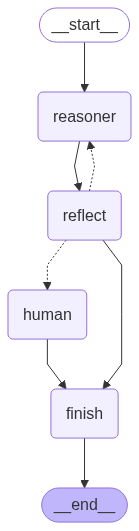

In [9]:
from agents.reasoner import classify

display(Image(classify.get_graph().draw_mermaid_png()))

In [10]:
for classify_chunk in await classify.ainvoke(
    {
        "msgs": [msg.message for msg in msgs],
        "grades": grades,
    }
):
    print("CHUNK", classify_chunk)

CHUNK grades
CHUNK msgs
CHUNK finished_state
CHUNK interrupt_state
CHUNK __interrupt__


In [ ]:
from agents.reasoner import full_graph

display(Image(full_graph.get_graph().draw_mermaid_png()))